# Assignment 4 : Neural Networks


### Himanshu Sunil Dhawale
### 801084142

## I. Overview

The aim of this assignment is to use NeuralNet class for regression and implement on regression data used in assignment 1. I'm supposed to explain and use 5-fold cross validation to find a good neural network parameters and report the CV accuracies. There'll be a good summary for the nonlinear regression model and how I used the NeuralNet class for regression and applied to my dataset. Also, I have provided the summary for the nonlinear logistic regression model and completed the code for nonlinear logistic regression class. I've applied this code on toy data and my classification data. Since the classification data was imbalanced, I made some changes to the class of the dataset to make it a balanced dataset.

# Data Description


This Dataset is for predictive models for the energy use of appliances. Data used include measurements of temperature and humidity sensors from a wireless network, weather from a nearby airport station and recorded energy use of lighting fixtures. 

<b> date time year-month-day hour:minute:second </b><br> <br> 
<li type="square">Appliances, energy use in Wh </li><br>
<li type="square">lights, energy use of light fixtures in the house in Wh</li> <br>
<li type="square">T1, Temperature in kitchen area, in Celsius </li><br>
<li type="square">RH_1, Humidity in kitchen area, in %</li> <br>
<li type="square">T2, Temperature in living room area, in Celsius</li> <br> 
<li type="square">RH_2, Humidity in living room area, in % </li><br>
<li type="square">T3, Temperature in laundry room area </li><br>
<li type="square">RH_3, Humidity in laundry room area, in % </li><br>
<li type="square">T4, Temperature in office room, in Celsius</li> <br>
<li type="square">RH_4, Humidity in office room, in %</li> <br>
<li type="square">T5, Temperature in bathroom, in Celsius</li> <br>
<li type="square">RH_5, Humidity in bathroom, in %</li> <br>
<li type="square">T6, Temperature outside the building (north side), in Celsius</li> <br>
<li type="square">RH_6, Humidity outside the building (north side), in % </li><br>
<li type="square">T7, Temperature in ironing room , in Celsius </li><br>
<li type="square">RH_7, Humidity in ironing room, in % </li><br>
<li type="square">T8, Temperature in teenager room 2, in Celsius </li><br>
<li type="square">RH_8, Humidity in teenager room 2, in % </li><br>
<li type="square">T9, Temperature in parents room, in Celsius </li><br>
<li type="square">RH_9, Humidity in parents room, in % </li><br>
<li type="square">To, Temperature outside (from Chievres weather station), in Celsius </li><br>
<li type="square">Pressure (from Chievres weather station), in mm Hg </li><br>
<li type="square">RH_out, Humidity outside (from Chievres weather station), in %</li> <br>
<li type="square">Wind speed (from Chievres weather station), in m/s </li><br>
<li type="square">Visibility (from Chievres weather station), in km </li><br>
<li type="square">Tdewpoint (from Chievres weather station), Â°C </li><br>
<li type="square">rv1, Random variable 1, nondimensional </li><br>
<li type="square">rv2, Random variable 2, nondimensional </li><br>


In [3]:
from IPython.display import Latex
from IPython.display import Math


import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
from plotly import tools


import plotly.plotly as mypy
import plotly
plotly.tools.set_credentials_file(username='black_uchiha08', api_key='tA6Q1kyjqYi4Tqlrm9RC')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot




In [5]:
init_notebook_mode(connected=True) 

In [6]:
df= pd.read_csv('energydata_complete.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [6]:
df.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

# Plots to visualize data

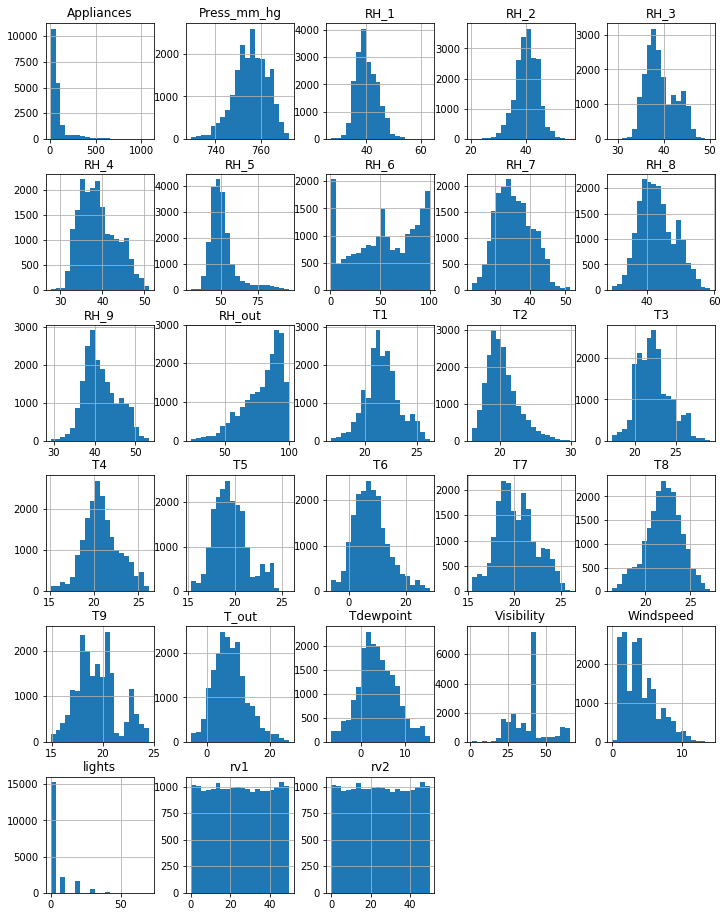

In [7]:
df.hist(bins = 20 , figsize= (12,16)) ;

As we can see there are some plots with irregular distribution. Let us focus on plotting these graphs separately. 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



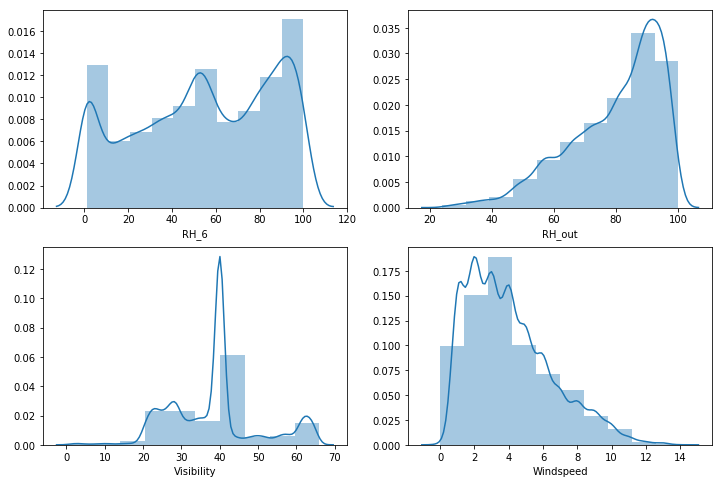

In [8]:
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(df["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(df["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(df["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(df["Windspeed"],bins=10, ax=ax[1][1])

I have focussed on these displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution. 

In [9]:
trace11 = go.Scatter(x=df['T1'], y=df['RH_1'])
trace12 = go.Scatter(x=df['T2'], y=df['RH_2'])
trace13 = go.Scatter(x=df['T3'], y=df['RH_3'])
trace21 = go.Scatter(x=df['T4'], y=df['RH_4'])
trace22 = go.Scatter(x=df['T5'], y=df['RH_5'])
trace23 = go.Scatter(x=df['T6'], y=df['RH_6'])
trace31 = go.Scatter(x=df['T7'], y=df['RH_7'])
trace32 = go.Scatter(x=df['T8'], y=df['RH_8'])
trace33 = go.Scatter(x=df['T9'], y=df['RH_9'])

fig11 = tools.make_subplots(rows=3, cols=3, subplot_titles=('T1 vs RH_1', 'T2 vs RH_2', 'T3 vs RH_3', 
                                                          'T4 vs RH_4', 'T5 vs RH_5', 'T6 vs RH_6',
                                                        'T7 vs RH_7', 'T8 vs RH_8', 'T9 vs RH_9'))

fig11.append_trace(trace11, 1, 1)
fig11.append_trace(trace12, 1, 2)
fig11.append_trace(trace13, 1, 3)
fig11.append_trace(trace21, 2, 1)
fig11.append_trace(trace22, 2, 2)
fig11.append_trace(trace23, 2, 3)
fig11.append_trace(trace31, 3, 1)
fig11.append_trace(trace32, 3, 2)
fig11.append_trace(trace33, 3, 3)


fig11['layout'].update(height=900, width=900, title='Temperature vs Pressure of each room')
                            
mypy.iplot(fig11)



##This has all the subplots for T1vsRH_1,t2 and so on T=temperature, RH=humidity

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]
[ (2,1) x4,y4 ]  [ (2,2) x5,y5 ]  [ (2,3) x6,y6 ]
[ (3,1) x7,y7 ]  [ (3,2) x8,y8 ]  [ (3,3) x9,y9 ]

The draw time for this plot will be slow for all clients.


/anaconda3/lib/python3.7/site-packages/plotly/api/v1/clientresp.py:40: UserWarning:

Estimated Draw Time Too Long

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [10]:
visual = go.Scatter( x= df.date  ,  mode = "lines", y = df.Appliances )

layout = go.Layout(title = 'Appliance energy consumption measurement' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visual],layout=layout)

mypy.iplot(fig)

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



#### This graph is to understand the timeseries variation of the applaince energy consumption



In [11]:
df['lights'].value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

In [12]:
trace5 = go.Histogram(
    x=df['T_out'],
    opacity=0.75
)
trace6 = go.Histogram(
    x=df['Tdewpoint'],
    opacity=0.75
)

data5 = [trace5, trace6]
layout3 = go.Layout(barmode='overlay')
fig = go.Figure(data=data5, layout=layout3)

mypy.iplot(fig, filename='overlaid histogram')

/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [13]:
data2 = [go.Histogram(x=df['T_out'],
                     histnorm='probability')]

mypy.iplot(data2, filename='normalized histogram')




/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [14]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Reading and analyzing the plots

In this dataset, I've observed that :

General observation: 

1. T_out i.e temperature outside the house has maximum correlation with Tdewpoint and other temperatures in different rooms T1, T2, T3 ... T9. 
2. Windspeed also had some kind of correlation.
3. Also, on the above graph it can be observed that there's some kind of dependency between each room's temperature and the percentage of humidity in that particular room. The graphs plotted are between T1 vs RH_1, T2 vs RH_2, ... T9 vs RH_9. 
4. There's another significant attribute that is the windspeed. On observing the windspeed attribute carefully, I came to the conclusion that some of the values were missing so I used min max scaling to normalize my data. I observed windspeed by plotting a histogram and looking that the minimum value was 0.0.
5. After normalization, another histogram was plotted. It can be observed from the histogram that there's no such zero values for the windspeed anymore. It means that our normalization worked successfully. 
6. I also realized that temperature is widely spread and can be used to predict based on these features.
7. From the histogram above this graph, it can be observed that how temperature and Tdewpoint are widely spread across and yet they have some kind of linear dependency in them. I used hit and trial to plot various graph and checked how they are dependent on each by plotting the same graph i.e temperature against various attributes. 


Observation 1: 

1. Humidity - All columns follow normal distribution except RH_6 and RH_out.
2. Temperature - All the columns follow normal distribution except T9
3. Appliance - This column is postively skewed , most the values are around mean 100 Wh.
4. Windspeed column is negatively skewed
5. Visibilty column is negatively skewed
6. Random variables have no role to play


Observation 2: 

1. Temperature columns - Temperature inside the house varies between 14.89 (T9) Deg & 29.85 (T2) Deg , temperature outside (T6) varies between -6.06 Deg to 28.29 Deg. The reason for this variation is sensors are kept outside the house.

2. Appliances - 75% of Appliance consumption is less than 100 Wh . With the maximum consumption of 1080 Wh there will be outliers in this column and there are small number of cases where consumption is very high

3. Humidiy columns - Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

4. Lights column - Lights column has 1525 0 entries. Hence, it is not useful column. 

## Preprocessing of the data

In [15]:
df=df.drop(['date'],axis=1)


In [16]:

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [17]:
df_target=pd.DataFrame(df.iloc[:,0])
df=df.drop(['Appliances', 'rv1', 'rv2'],axis=1)
df.head()


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [18]:
df_target.shape

(19735, 1)

In [19]:
df.shape

(19735, 25)

## Summary of Neural Networks, NonLinear Regression, Cross Validation and activation function

#### Neural Networks
Neural networks are the computational models inspired by the brain. Elements of neural networks are input layer, an output layer and hidden layers. Input layer consists of nodes that are the features of the dataset whereas the output layer nodes are the classes to which the entry belongs. Hidden layer performs all sort of computation on the features entered through the input layer and transfer the result to the output layer. Inputs are fed into the network through input layer and the outputs are calculated and returned through output layers. This process is called forward propagation. These computed values are compared with actual values and the weights are updated based on the errors. This process is called Backward propagation. 

#### Nonlinear Regression 
Nonlinear regression is a form of regression analysis in which data is fit to a model. Simple linear regression relates two variables and gives a straight line y = mx + c while nonlinear regression will generate a curve. The main objective of the model is to make the sum of the squares as small as possible. The sum of squares is used to check how our observations are varying from the mean of the data set. The smaller the sum of these squared figures, the better the function fits the data points in the set.

#### Cross validation 
Cross validation divides the training data into several parts (K parts) of approximately equal size. Each part is selected in turn as the testing data. For each k = 1,2,...K, fit the model with parameter lambda to the other K − 1 parts, compute its error in predicting􏰀 the kth part. Do this for many values of lambda and choose the value of lambda that makes CV(lambda) as the smallest. Typically, we use 5 or 10 fold. In this assignment, I've used 5 fold cross validation. 


#### Activation function
The activation function does the nonlinear transformation to the input making it capable to learn and we send this to the next layer of neurons. There are several different types of activation function like tanh, ReLu, Leaky ReLu, Sigmoid, step function, etc. 

# Neural Network

In [7]:
# standardization class
class Standardizer: 
    """ class version of standardization """
    def __init__(self, X, explore=False):
        self._mu = np.mean(X,0)  
        self._sigma = np.std(X,0)
        if explore:
            print ("mean: ", self._mu)
            print ("sigma: ", self._sigma)
            print ("min: ", np.min(X,0))
            print ("max: ", np.max(X,0))

    def set_sigma(self, s):
        self._sigma[:] = s

    def standardize(self,X):
        return (X - self._mu) / self._sigma 

    def unstandardize(self,X):
        return (X * self._sigma) + self._mu 
    

  

In [8]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

# Explanation of codes

There are two classes defined above. One is <b> Standardizer class </b>  and the other is <b> NeuralNet class </b> . 
<br>
    
1. The Standardizer class normalizes all the values. <br><br>
2. NeuralNet class builds the neural network that learns the data through feed forward and back propagation. <br>
    
<br> 
    
3. The nunits takes the number of inputs, hidden units, and outputs. <br> <br>

4. The set_hunit function is used to either update or initiate the weights. It takes the weight as the parameter. <br> <br>

5. The Pack function packs the multiple weights of each layer into one vector. The unpack function does vice versa. <br> <br>

6. Forward pass in neural network propagates as shown below: <br> <br>

$$
\begin{align}
Z &= h(Xl \cdot V) \\
\\
Y & = Zl \cdot W 
\end{align}
$$

7. Activation function is used to make the network nonlinear. <br> <br>

8. In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer. Below are the functions that are excecuted during backward pass. <br> <br>

$$
\begin{align}
V &\leftarrow V + \alpha_h \frac{1}{N} \frac{1}{K} Xl^\top \Big( (T - Y) W^\top \odot (1 - Z^2) \Big) \\
W &\leftarrow W + \alpha_o \frac{1}{N} \frac{1}{K} Zl^\top \Big( T - Y \Big) 
\end{align}
$$

9. The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda. <br> <br>

10. The optimtarget function tries to reduce the error by using the object function and updates the weights accordingly. <br> <br>

11. The use function is applied to the test data after training the model. Testing data is passed as parameter and it stadardizes the data. Then forward is applied on the data which returns the predictions. <br> <br>


12. _nLayers is the number of hidden unit layers. <br> <br>

13. rho is the learning rate attribute of the class. <br> <br>

14. _W is the weights. <br> <br>

15. _weights is the weights that is _W written in one dimension. <br> <br>

16. stdX is the standardization class for the data. <br> <br>

17. stdT is the standardization class for the target. <br>



In [9]:
from sklearn.metrics import mean_squared_error

# Cross Validation 

In [10]:
#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist
    




# Explanation of codes 

The split function is used to divide the data into partions. In this code, split function will split parts of 20% of whole data. So myList will give five 20% of 100% of data. We iterate through the length of s (data) and keep on appending to myList so we've like 5 parts now and we will return the list. 


The cross_validate function takes X which contains the sample, T which contains the target values of the samples and model parameters as input. This function returns final_list and best_paramlist. This function first divides data into 5 partitions using split() function. These partitions are stored into X_partitioned and T_partitioned. These are nothing but lists. Each element of these lists are 20% of the original data size. 



Now for loop iterates through all the 5 parts and i is like test data's index of X_partitioned and T_parititoned lists. The remaining data is used as training set. Now inside for loop X_test and Y_test are declared using X_paritioned[i], T_partitioned[i].

k is the validation part of the 5 parts. Excluding k and i the rest data is our training set.

In each validation loop we are training data with our different parameters passed and evaluating on validation data. Each parameter returns rmse value and this is appended to rmselist, parameters respective to that rmse are appended into paramlist to keep track of indices. Now after each validation we are selecting the parameter that produced minimum rmse value and storing the results into history_rmse and params list.


From this history_rmse list  we are picking one  with best results. Now I retrain the model with the best parameter param in parameters and applied the model to test set. This test accuracy is appended to final_list and parameters are appended to best_paramlist. This operation runs for 5 folds and cross validate function returns final_list and best_paramlist which are best Accuracies of each test and best Params of each test. 

From this results we choose the parameters that is repeated more number of times in best_paramlist.

# Presentation of CV result

In [80]:
models = [[25,3,1],[25,5,1],[25,7,1], [25,10,1], [25,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(df), np.array(df_target), models)

Test number:  0
K is :  0
K is :  1
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[123.91643577386266, 176.7555885178329, 149.4960548041387, 213.17069218159142, 210.18131719475232]
123.91643577386266
[25, 3, 1]
K is :  2
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[194.69583125043036, 187.87065105802372, 173.32308646185126, 174.3362727885026, 233.10531110572325]
173.32308646185126
[25, 7, 1]
K is :  3
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[177.3272636914399, 151.47293003200082, 139.78037810398797, 226.61324229461582, 155.27891569091364]
139.78037810398797
[25, 7, 1]
K is :  4
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[120.66664284296544, 138.2499625835023, 226.08974683979903, 165.72660951816027, 261.79297896490067]
120.66664284296544
[25, 3, 1]
[[25, 3, 1], [25, 7, 1], [25, 7, 1], [25, 3, 1]]
[123.91643577386266, 173.32308646185126, 139.78037810398797, 120.66664284296544]
[25, 10, 1]
Test number:  1
K is 

In [81]:
#df.shape
from sklearn import model_selection


In [82]:
print(bestAccuracy,bestParam)

[148.56655363328863, 158.1956571064257, 123.43710706848702, 143.60120597126655, 151.27843734461052] [[25, 10, 1], [25, 3, 1], [25, 3, 1], [25, 3, 1], [25, 3, 1]]


In [83]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(df),np.array(df_target),test_size=0.30,random_state=40)

In [125]:
model=NeuralNet([25,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

{'w': array([ 3.79260338e+00,  4.59003354e+00,  1.40101884e+00, -5.83694329e-01,
         8.16968658e+00, -1.49751760e-01,  6.45424052e+00, -1.35053607e+01,
        -3.49889074e-01, -1.29441908e+01, -1.11798941e+01, -2.31098858e+00,
         8.29371355e+00,  2.38246186e+01,  2.33294114e+00,  1.19074104e+01,
         1.42267875e+01,  2.74156734e+00,  2.17616441e+00, -1.69269162e+00,
        -1.24649997e+00, -5.72603572e+00, -1.43682177e+00, -8.83424109e-01,
        -4.65558693e+00,  1.35300252e-01, -6.27250602e-02, -1.85173350e+01,
         3.54555585e+00, -3.04312016e-01,  5.28387535e+00, -3.03381959e+00,
         2.24968111e-02,  3.70720514e+00,  2.49578234e+00,  2.33756840e-01,
         5.60540393e+00,  1.20893215e+01, -1.51968507e-01,  1.49395452e+01,
         2.30252168e+00,  4.14738849e-01, -4.54747650e+00, -8.17460765e+00,
        -4.08722656e-01, -1.34477879e+00,  4.37871933e-02,  1.08633975e-01,
         6.03657209e+00,  1.40423464e+00, -3.16874278e-01, -2.03305474e+00,
       

In [126]:
y_pred=model.use(X_test)

In [127]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 91.20363187983625
R squared value: 0.19754562502362494


# Plots of results

In [56]:
# Residual plot for LinearRegress model
sns.residplot(y_pred.flatten(), y_test.flatten(), color=(0.8, 0.35, 0.25))
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');


NameError: name 'y_pred' is not defined

##### Negative residual meaning predicted too high
##### Positive residual meaning predicted too low

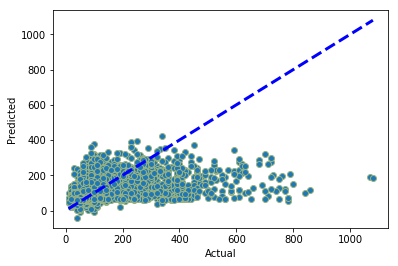

In [119]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0.6,0.7,0.5))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'b--', lw=3)
ax.set_ylabel('Predicted')
ax.set_xlabel('Actual')
plt.show()

Text(0.5, 1.0, 'NN model predictions')

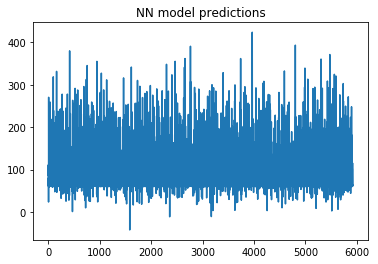

In [120]:
plt.plot(y_pred)
plt.title("NN model predictions")

## Discussions about parameter/network structure choice
## Explanation of CV results

In this assignment I built 3 layer neural network. Input layer has 25 nodes because there are 25 features in my data. Output layer has 1 node. 

I've not only used 3 layer. But I repeated the process with many layers and it was interesting to find that 3 layers give better results than any more.

I tried for the best network structure by changing the number of nodes in hidden layer. I performed 5 fold cross validation by passing my models variable as [[25, 7, 1], [25, 3, 1], [25, 3, 1], [25, 3, 1], [25, 3, 1]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes. 

From the results of cross validation we can see that model [25, 3, 1] has appeared more number of times. The rmse values returned for [25, 3, 1] in the final result are [139.39233934703591, 194.7584361811358, 118.49652180078164, 127.93880937678452] and for [25, 7, 1] as 133.6052055162683.

The model with number of nodes in hidden layer 3 works better. With more number of nodes in hidden layer network its  overfitting the data.

Hence, I've used [25,3,1] as the final structure.

## Discussions about Prediction results

In this assignment I have performed regression analysis using Neural network which is non linear regression problem. 
On training the model using NeuralNet with optimum structure [25,3,1], model has produced a RMSE: 90.88873712706322
R squared value: 0.20307725667710697 for 100 iterations.

We are free to choose hidden layers, hidden nodes that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used tanh as activation function. The gradient is updating the weights in each layer during back propagation which made network work so well.

I tried with 25 layers and 1000 iterations I got R squared value around 0.38. There's a strange variation in results obtained by this dataset. For increasing number of layers, the model should have improved but it seems like model with 3 layers is better for this dataset. 

# Nonlinear Logistic Regression

## Data Description 

Data used in this assignment is of classification data which was used in the Assignment 0. This dataset is provided by NASA on their official website. The dataset consists of 10 features. The dataset is of Meteorites' Landings. It contains information about all the tracked meteorites by NASA. It has an interesting column called "Fall" which states the aftermath of meteorites whether or not it fell or it was found. These dataset contains information about the mass of meteorites which is another important feature to keep track of. The mass of meteorites provided are in grams. We don't need to normalize the column in kgs since for our classification problem mass is fine, too, as long as we are able to classify our problem correctly. There are many classes, 422 to be precise, for the meteorites to fall into. These classes are based upon the meteorites size and geolocation. Latitude and Longitude of the meteorites are provided. Other features available are the id associated with meteorites, nametype, name and year. We'll look into this dataset more clearly by visualizing this dataset.

In [58]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataframe=pd.read_csv("Meteorite_Landings.csv")


dataframe.head(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.166670, -64.950000)"


# Visualizing and preprocessing 

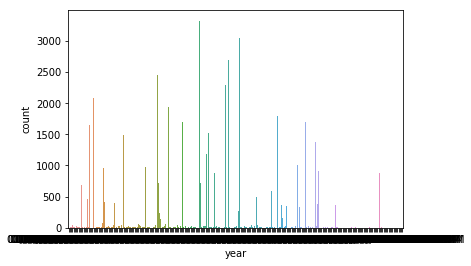

In [59]:
sns.countplot(dataframe['year'])

In [60]:
def convert_year(full_date):
    if type(full_date) == str:
        temp = full_date.split('/')[2]
        year=temp.split(' ')[0]
        return int(year)
    else:
        return False

dataframe['new_year'] = dataframe['year'].apply(convert_year)

In [61]:
def clearview(graph):
    for i, label in enumerate(graph.get_xticklabels()):
        if i % 2 == 0:
            label.set_visible(True)
        else:
            label.set_visible(False)

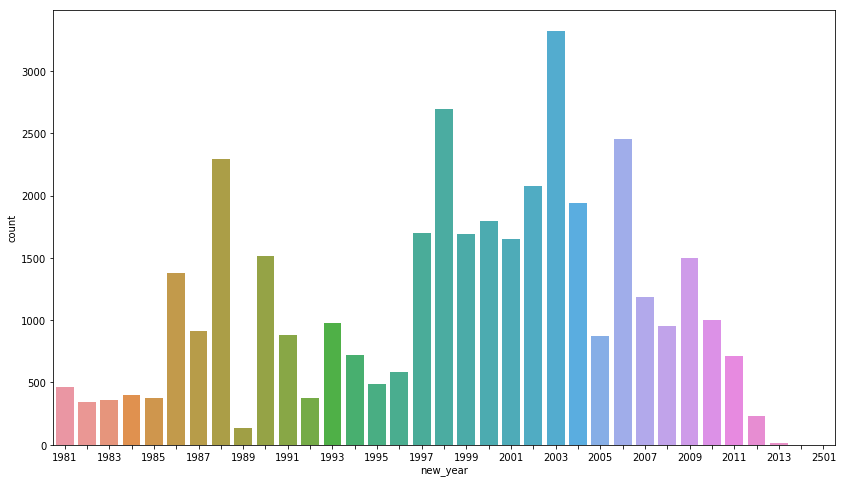

In [62]:
tempx = dataframe['new_year'] > 1980

plt.figure(figsize=(14,8))
mygraph = sns.countplot(x='new_year', data=dataframe[tempx])
clearview(mygraph)

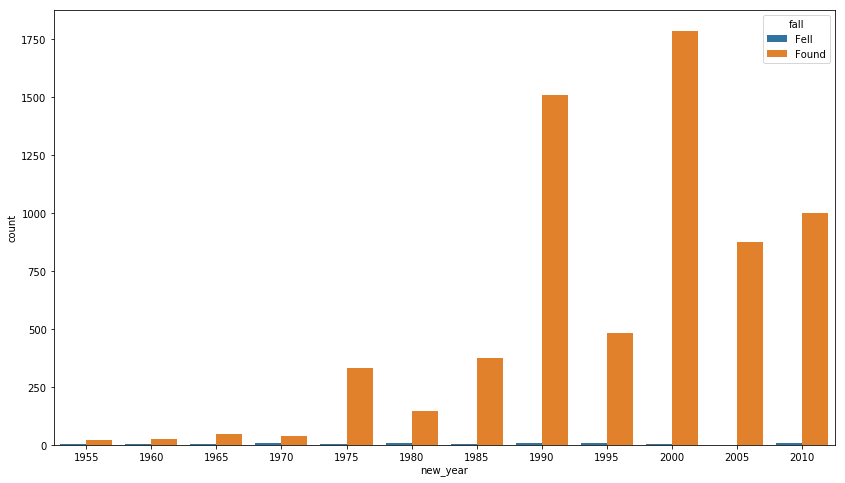

In [63]:
plt.figure(figsize=(14,8))

temp0 = dataframe['new_year'] % 5 == 0
temp1 = dataframe['new_year'] > 1950

graphx=sns.countplot(
    x='new_year', 
    hue='fall',
    data=dataframe[temp0 & temp1]
)

In this graph I separated them on the basis of 5 years. There's a 5 year time gap for each bar plotted on the graph. Orange color indicates the found meteorites while blue color indicates the fell meteorites.

In [64]:
trace = go.Pie(labels=dataframe['fall'], values=dataframe['mass (g)'])
 
mypy.iplot([trace])

/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


This graph shows a class (fall) of meteorites based on fell and found and from looking at this graph we can clearly see that the percentage of found is way more than that of fell. Hence, we can say that our data is imbalance. We need a balanced data class else our model will be predicting only one class most of the times. This might also result in F1 score of 0.0. Also, there may be cases where our test dataset will have all the data for found and no single data element (row) with fell. So to make a balance data for classification we'll not choose this class. We'll create our own class called as "status" and we will try to predict the status of the meteorites based on other columns available. 

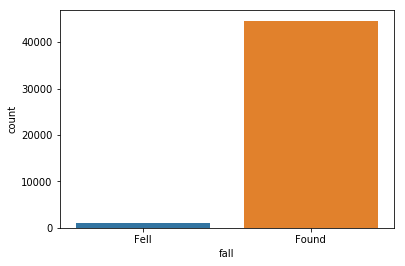

In [65]:
sns.countplot(dataframe['fall'])

In [66]:
data = [ dict(
    lat = dataframe['reclat'],
    lon = dataframe['reclong'],
    text = dataframe['mass (g)'],
    marker = dict(
        color = dataframe['mass (g)'],
        colorscale = 'YlOrRd',
        reversescale = True,
        symbol='square',
        opacity = 0.7,
        size = 6,
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            title="Mass (g)",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            #dtick = 100
        ),
    ),
    type = 'scattergeo'
) ]


layout = dict(
    geo = dict(
        scope = 'world',
        showland = True,
        landcolor = "rgb(91, 94, 132)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(190, 195, 196)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'equirectangular',
            rotation = dict(
                lon = -100
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.9,
            range= [ -140.0, -55.0 ],
            dtick = 100
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.9,
            range= [ 20.0, 60.0 ],
            dtick = 10
        )
    ),
    title = 'Meteorite Landings',
)

In [67]:
fig = { 'data':data, 'layout':layout }
mypy.iplot(fig, filename='meteorite')




/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

/anaconda3/lib/python3.7/site-packages/plotly/plotly/plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:


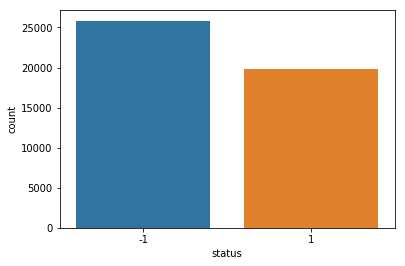

In [68]:
# Dropping Unwanted Columns
dataframe=dataframe.drop(['name'],axis=1)

dataframe=dataframe.drop(['id'],axis=1)

dataframe=dataframe.drop(['year'],axis=1)

dataframe=dataframe.drop(['GeoLocation'],axis=1)
dataframe['mass']=dataframe['mass (g)']
dataframe=dataframe.drop(['mass (g)'],axis=1)

dataframe=dataframe.drop(['new_year'],axis=1)





dataframe['status'] = np.where(dataframe.mass > 50 , 1, -1)

sns.countplot(dataframe['status'])

dataframe = dataframe.replace({'?': np.nan}).dropna()
dataframe=dataframe.dropna()
dataframe = dataframe.reset_index(drop=True)

dataframe['fall']=lb.fit_transform(dataframe['fall'])

dataframe['recclass']=lb.fit_transform(dataframe['recclass'])

dataframe['reclat']=lb.fit_transform(dataframe['reclat'])

dataframe['reclong']=lb.fit_transform(dataframe['reclong'])

dataframe['nametype']=lb.fit_transform(dataframe['nametype'])




Hence, I created a new class called status. This class is based on the mass of the meteorites. For all meteorites having mass less than 50 are in one group and the rest are on the other group.

# Reading and analyzing the plots

From the above plots plotted, I have observed many behaviors of this datasets. 

1. <b> Countplot of new_year </b> : In this graph x-axis is not clear. So I plotted two more graphs with clear x-axis values. This is a countplot for new_year. I have observed this more clearly by separating x-axis numbers so that I have more space to view in what particular year I had high number of peak. This countplot was plotted based upon the year number. I preprocessed the data by splitting the string of date (feature name= year) and created a new column, "new_year", in this column only years were added and a countplot was plotted. <br><br>

2. <b> Countplot of new_year with clear x-axis </b> : This is a countplot and it has much clear vision than the previous count plot. In this plot we are able to see how meteorites are distributed over the years. In this graph, I just separated them on the basis of even number and years greater than 1980 to have a better view of year countplot. <br> <br>

3. <b> Countplot of new_year with 5 year separation and both status </b> : This is a countplot and it has much clear vision of number of fell meteorites and number of found meteorites. In this graph I separated them on the basis of 5 years. There's a 5 year time gap for each bar plotted on the graph. Orange color indicates the found meteorites while blue color indicates the fell meteorites. <br><br>

4. <b> Pie chart of fall column </b> : This graph shows a class (fall) of meteorites based on fell and found and from looking at this graph we can clearly see that the percentage of found is way more than that of fell. Hence, we can say that our data is imbalance. We need a balanced data class else our model will be predicting only one class most of the times. This might also result in F1 score of 0.0. Also, there may be cases where our test dataset will have all the data for found and no single data element (row) with fell. So to make a balance data for classification we'll not choose this class. We'll create our own class called as "status" and we will try to predict the status of the meteorites based on other columns available. <br><br>

5. <b> Countplot of Fall </b>:  In this graph Fell tells about the meteorite that landed on a surface where as found tells about the meteorite that was found but not fell on the surface. We can observe that the Found meteorites totally outnumbered Fell meteorites in this dataset. <br><br>

6. <b> USA Map of meteorites </b> : This graph shows meteorites that landed on United States. Hovering over each meteorite marks can let user see its geocoordinates. In this graph, we can observe how meteorites are distributed all over the United States based upon their geolocations. <br><br>

In [69]:
dataframe.head(5)

,nametype,recclass,fall,reclat,reclong,mass,status
0,1,302,0,12462,2937,21.0,-1
1,1,177,0,12613,3055,720.0,1
2,1,77,0,12569,428,107000.0,1
3,1,0,0,6257,925,1914.0,1
4,1,308,0,5519,2174,780.0,1


Now, this looks like a fine picture of the dataset that we have. 

In [70]:
y_dataframe=dataframe['status']
dataframe_lr=dataframe.drop(['status'],axis=1)
from sklearn import model_selection
from sklearn.metrics import r2_score


## Summary of nonlinear logistic regression

The linear logistic regression that uses the softmax layer for classification along with a linear model. In nonlinear logistic regression extra layers are added called as hidden layers. With the inclusion of hidden layer the softmax function is used in the last layer. Till then the input layer passes its output to hidden layer, then the hidden layer to another hidden layer or softmax function and the softmax function then gives the output. 


 $$
wv_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(xv_n)\Big) xv_n.
 $$
 
 
<table>
<tr>
<th></th>
<th width=45%> Regression </th>
<th width=45%> Classification </th>
</tr>
<tr>
<td>
Forward Pass 
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Zm &= h(Xlm \cdot Vm) \\
\\
Ym & = Zlm \cdot Wm \\
Gm & = softmax(Ym)
\end{align}
$$
</td>
</tr>
<tr>
<td>
 Backward Pass 
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h \frac{1}{N} \frac{1}{K} Xlm^\top \Big( (Tm -Ym) Wm^\top \odot (1 - Zm^2) \Big) \\
Wm &\leftarrow Wm + \alpha_o \frac{1}{N} \frac{1}{K} Zlm^\top \Big( Tm - Ym \Big) 
\end{align}
$$
</td>
<td>
$$
\begin{align}
Vm &\leftarrow Vm + \alpha_h Xlm^\top \Big( (Tm - Gm) Wm^\top \odot (1 - Zm^2) \Big)\\
Wm &\leftarrow Wm + \alpha_o Zlm^\top \Big(  Tm - Gm\Big) 
\end{align}
$$
</td>
</tr>
<tr>
<td></td>
<td></td>
<td>

</tr>
</table> 
 

 
 

In [71]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        expz = np.exp(z) 
        return expz / (np.sum(expz, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(expz))

    
    def forward(self, X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
                t=self.softmax(t)
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
        return (t, Z)
                

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        return -(np.sum(T*(np.log(Y)))+wpenalty)

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')
                
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(X)
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(X)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)
            
        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        Y, Z = self.forward(X)
        l=np.argmax(Y,1)
        return Y,l

# Explanation of code 

There is a NeuralNetLogReg class which has following functions: 

1. __init__ function is a constructor of the class which calls the NeuralNet class' constructor for assigning values to nLayers i.e the number of layers for the model. <br><br>

2. _nLayers is the number of hidden unit layers. <br> <br>

3. rho is the learning rate attribute of the class. <br> <br>

4. _W is the weights. <br> <br>

5. _weights is the weights that is _W written in one dimension. <br> <br>

6. stdX is the standardization class for the data. <br> <br>

7. stdT is the standardization class for the target. <br>

8.  The train function takes the feautures and the target as the input. The gradientf unpacks the weights,proceeds with the forward pass by calling forward function. Now error is calculated using results of forward pass. Now back propagation is proceeded by calling backward function with parameters as error, Z, T(Target), _lambda

9. Forward pass in neural network propagates same as in the class discussed above the only difference is that and an additional t=self.softmax(t) is added to the last layer. The last layer will be the softmax function which then gives output to the output layer. 


10. Activation function is used to make the network nonlinear. <br> <br>

11. In the backward pass the function takes the the z values, Target values and the error as input. Based on the delta value, the weights and the bias are updated accoringly. This method returns the weight vector packed together of that particualr layer. Below are the functions that are excecuted during backward pass. <br> <br>

 $$
 W \leftarrow W + \alpha_o Zl^\top \Big(  T - g(X)\Big).
 $$


$$
 V \leftarrow V + \alpha_h Xl^\top \Big( (T - g(X)) W^\top \odot (1 - Z^2) \Big).
$$
 


In [72]:
def add_ones(w):
    return np.hstack((np.ones((w.shape[0], 1)), w))

In [73]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [74]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [75]:
from sklearn.metrics import roc_curve, auc

# Testing model with Dummy/Toy Data

Text(0.5, 1.0, 'test data set')

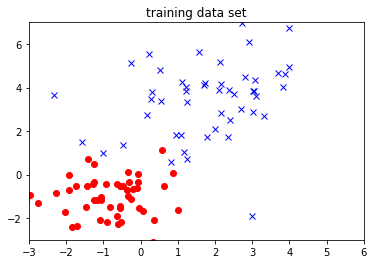

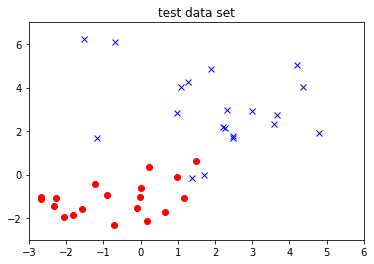

In [76]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

In [77]:
clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y = clsf.use(Xtest)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide



In [78]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [79]:
classes

array([[0.4992367 , 0.5007633 ],
       [0.49922571, 0.50077429],
       [0.49925442, 0.50074558],
       [0.49891442, 0.50108558],
       [0.49952768, 0.50047232],
       [0.49912808, 0.50087192],
       [0.49947681, 0.50052319],
       [0.49888559, 0.50111441],
       [0.49926162, 0.50073838],
       [0.49893239, 0.50106761],
       [0.49902045, 0.50097955],
       [0.49894789, 0.50105211],
       [0.49924369, 0.50075631],
       [0.49959995, 0.50040005],
       [0.49960672, 0.50039328],
       [0.49944861, 0.50055139],
       [0.49906978, 0.50093022],
       [0.49957651, 0.50042349],
       [0.49936244, 0.50063756],
       [0.4990748 , 0.5009252 ],
       [0.49837625, 0.50162375],
       [0.49769468, 0.50230532],
       [0.49835709, 0.50164291],
       [0.5000089 , 0.4999911 ],
       [0.49864639, 0.50135361],
       [0.49822111, 0.50177889],
       [0.50053883, 0.49946117],
       [0.49913489, 0.50086511],
       [0.49917058, 0.50082942],
       [0.49819016, 0.50180984],
       [0.

Accuracy:  50.0 %


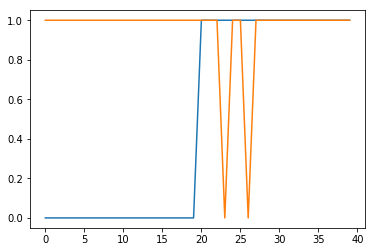

In [80]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(Y)

print("Accuracy: ", 100 - np.mean(np.abs(Ttest - Y)) * 100, "%")

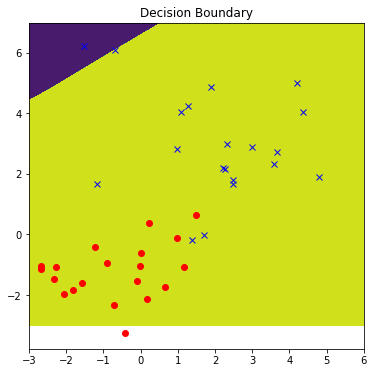

In [81]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _ = clsf.use(X)
zs = _.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

## Discussion about dummy data 

The code works well with 50% accuracy. Hence, we can say that our NeuralNetLogReg class is working. 

# Testing on classification dataset

In [82]:
XTrain, XTest, YTrain, YTest = model_selection.train_test_split(dataframe_lr, y_dataframe,test_size=0.20,random_state=42)

In [83]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [84]:
nn = NeuralNetLogReg([6,4,2])
nn.train(sc.fit_transform(XTrain), T, niter=1000) 
p,l = nn.use(sc.fit_transform(XTest))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning:

divide by zero encountered in log

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning:

invalid value encountered in multiply

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with inp

# Plots and results

In [85]:
y_test=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test, l))
print('Accuracy:', accuracy_score(y_test, l))

F1 score: 0.34100204498977504
Accuracy: 0.6633146140786209


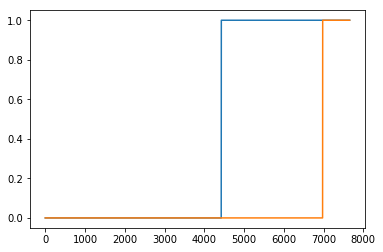

In [86]:
plt.plot(np.sort(y_test))
plt.plot(np.sort(l))

In [87]:
cf3=confusion_matrix(y_test, l)
cf3
TP=cf3[1][1]
TN=cf3[0][0]
FN=cf3[1][0]
FP=cf3[0][1]


In [88]:
precision=TP/(TP+FP)
specificity=TN/(TN+FP)
recall=TP/(TP+FN)

In [89]:
print('Precision: ' ,precision)
print('Specificity: ' ,specificity)
print('Recall: ' ,recall)

Precision:  0.9794419970631424
Specificity:  0.9968368730230457
Recall:  0.20643763540699475


Text(0.5, 1.0, 'Confusion Matrix')

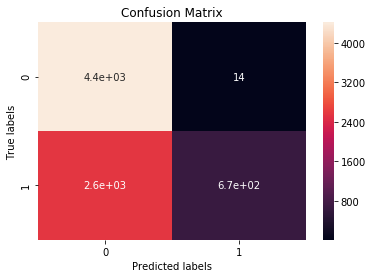

In [90]:
ax= plt.subplot()
sns.heatmap(cf3, annot=True, ax = ax);

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix')

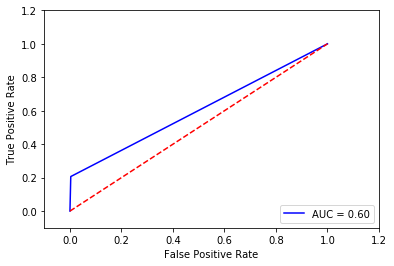

In [91]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, l)
roc_auc = auc(false_positive_rate, true_positive_rate)


##Plotting now
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

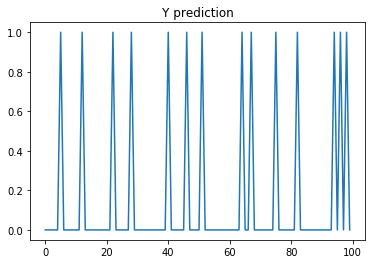

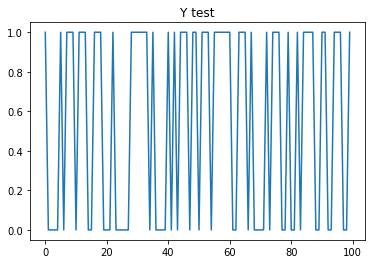

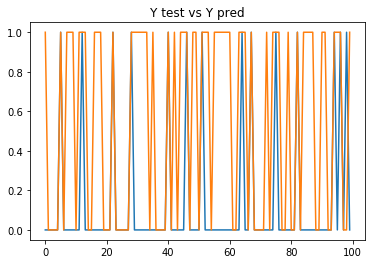

In [92]:
plt.title("Y prediction")
plt.plot(l[0:100])
plt.show()
plt.title("Y test")
plt.plot(np.array(y_test[0:100]))
plt.show()
plt.title("Y test vs Y pred")
plt.plot(l[0:100])
plt.plot(np.array(y_test[0:100]))
plt.show()

# Cross validation code for nonlinear logistic regression 

In [ ]:
def split(s):
    avg = len(s) / 5.0
    out = []
    last = 0.0
    while last < len(s):
        out.append(s[int(last):int(last + avg)])
        last += avg
    return out

final_list=[]
best_paramlist=[]
def cross_validate(X, T, parameters):
    partitionedX = split(X)
    partitionedT = split(T)
    for test in range(5): 
        print("test",test)
        Xtest = partitionedX[test]
        Ttest = partitionedT[test]
        j = 0
        
        history_rmse=[]
        params=[]
        for val in range(5): 
            print("val",val)
            if test == val: continue
            
            Xval = partitionedX[val]
            Tval = partitionedT[val]
            
            Xtrain = partitionedX[not test and not val]
            Ttrain = partitionedT[not test and not val]
            
            i = 0
            flist=[]
            paramlist=[]
            for param in parameters:
                
                model = NeuralNetLogReg(param)
                model.train(Xtrain, Ttrain)
                prob,pred = model.use(Xval)
                Tval1=Tval[:,0]
                Tval1=np.where(Tval1==0,1,0)
                valAcc = f1_score(Tval1, pred)
                flist.append(valAcc)
                paramlist.append(param)
            print(flist)
            print(paramlist)
            #avg=sum(rmselist)/len(rmselist)
            #history_rmse.append(avg)
            print(max(flist))
            print(paramlist[np.argmax(flist)])
            history_rmse.append(max(flist))
            params.append(paramlist[np.argmax(flist)])
        print("history_rmse",history_rmse)
        print("params",params)
        #print(rmselist)
        print(history_rmse)
        print(params)
        bestParam = params[np.argmax(history_rmse)]
        print(bestParam)
        bestModel = NeuralNetLogReg(bestParam)
        
        Xtrain = partitionedX[not test]
        Ttrain = partitionedT[not test]
        bestModel.train(Xtrain, Ttrain)

        prob1,finalPred = bestModel.use(Xtest)
        Ttest1=Ttest[:,0]
        Ttest1=np.where(Ttest1==0,1,0)
        myf1 = f1_score(Ttest1, finalPred)
        final_list.append(myf1)
        best_paramlist.append(bestParam)

    return final_list,best_paramlist

### Cross validation's explaination of code is given at the start of this assignment


The difference is that we'll be finding the parameters which gives maximum f1 score to our model. We keep on appending it out best list of parameters and best list of f1 score. Below is the implemented version of the CV along with the results of CV. 

In [95]:
T = add_ones(np.array(y_dataframe).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [96]:
models = [[6,5,2], [6,7,2],[6,9,2], [6,12,2]]
bestAccuracy,bestParam = (cross_validate(np.array(dataframe_lr), T, models))

test 0
val 0
val 1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning:

divide by zero encountered in log

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning:

invalid value encountered in multiply



[0.9465954606141523, 0.9373187597590898, 0.9444197421076034, 0.9422519509476032]
[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
0.9465954606141523
[6, 5, 2]
val 2
[0.965089216446858, 0.9566279780085523, 0.9666048237476809, 0.9270246217739544]
[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
0.9666048237476809
[6, 9, 2]
val 3
[0.9393059587999447, 0.9562270545043773, 0.9416643627315455, 0.9504143840427027]
[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
0.9562270545043773
[6, 7, 2]
val 4
[0.9539703903095559, 0.9596752368064952, 0.9557474365893146, 0.9720608575380358]
[[6, 5, 2], [6, 7, 2], [6, 9, 2], [6, 12, 2]]
0.9720608575380358
[6, 12, 2]
history_rmse [0.9465954606141523, 0.9666048237476809, 0.9562270545043773, 0.9720608575380358]
params [[6, 5, 2], [6, 9, 2], [6, 7, 2], [6, 12, 2]]
[0.9465954606141523, 0.9666048237476809, 0.9562270545043773, 0.9720608575380358]
[[6, 5, 2], [6, 9, 2], [6, 7, 2], [6, 12, 2]]
[6, 12, 2]
test 1
val 0
[0.9819351177527665, 0.9823434991974317, 0.9827277017461066,

# Testing with optimum parameters

In [97]:
print(bestAccuracy)
print(bestParam)

[0.9799677204974842, 0.94496644295302, 0.9672411116286291, 0.9361526843333791, 0.9577464788732395]
[[6, 12, 2], [6, 12, 2], [6, 9, 2], [6, 12, 2], [6, 5, 2]]


In [98]:
T = add_ones(np.array(YTrain).reshape(-1,1))
T=T.astype(int)
T[:,0]=T[:,1]
T[T[:,0]==1]=0
(T[:,1])[T[:,1]==0]=1
(T[:,0])[T[:,0]==-1]=1
T[T==-1]=0

In [99]:
nn = NeuralNetLogReg([6,12,2])
nn.train(sc.fit_transform(XTrain), T,optim='scg') 
p,l = nn.use(sc.fit_transform(XTest))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning:

invalid value encountered in true_divide

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning:

divide by zero encountered in log

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning:

invalid value encountered in multiply

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning:

Data with inp

In [100]:
y_pred1=l
y_test1=np.where(YTest==-1,0,1)
print('F1 score:', f1_score(y_test1, y_pred1))
print('Accuracy:', accuracy_score(y_test1, y_pred1))

F1 score: 0.33014724877292695
Accuracy: 0.6613556223063863


# Discussions about parameter/network structure choice

In this assignment I built 5 layere neural network. Input layer has 6 nodes because there are 6 features in my data that are actually useful. Output layer has 2 node. 

I've not only used 5 layers. But I repeated the process with many layers and it was interesting to find that 12 layers give better results and it keeps on improving with more layers. This might not be true because it might lead to overfitting of data. But for my case, 12 layers seems to be the best fit for my dataset. 

I tried for the best network structure by changing the number of nodes in hidden layer. I performed 5 fold cross validation by passing my models variable as [[6,5,2], [6,7,2],[6,9,2], [6,12,2]]. Here first value represents input nodes, second value represents nodes in hidden layer, third value represents output nodes. 

From the results of cross validation we can see that model [6,12,2] has appeared more number of times. The f1 score values returned for [6,12,2] in the final result are [0.9799677204974842, 0.94496644295302, 0.9361526843333791] , and for [6, 9, 2] as 0.9672411116286291. For, [6, 5, 2] it is 0.9577464788732395.

The model with number of nodes in hidden layer 12 works better. With increasing layer the model keeps on improving With more number of nodes in hidden layer network its  overfitting the data.

Hence, I've used [6,12,2] as the final structure and I got F1 score: 0.33014724877292695 and Accuracy: 0.6613556223063863. 

# Discussion about the prediction results

In this assignment I have performed nonlinear logistic regression analysis using Neural network which is nonlinear regression problem. 
On training the model using NeuralNetLogReg with optimum structure [6,12,2], model has produced F1 score: 0.33014724877292695 and Accuracy: 0.6613556223063863 with optim="scg."

We are free to choose hidden layers, hidden nodes that suits our problem. Each node is connected to a activation function which makes the network more powerful. I used softmax as activation function at last layer. The gradient is updating the weights in each layer during back propagation which made network work so well.

I tried with 12 layers and I got 0.6613556223063863 as accuracy. For increasing number of layers, the model is improving as well. This means that with more layers the model will give more accuracy but it is not true since it may overfit the data. Hence, I left this with 12 layers as the best number of layers for this dataset. 

# Conclusion

In this Assignment  I learned Neural networks. I learned what makes Neural networks so powerful for complex problems. I also learned implementing k fold cross validation from scratch with out using any libraries. I learned how important it is in selecting the parameters. And I learned that sometimes increasing number of layers may not always improve the model since there is a case where it may overfit.  

Few challenges: Cross validation was really tough to implement. I faced many problems on keeping tracks of all the list used inside the cross validations also keeping track of all the indices took a lot of time to understand and implement.

# References 

Professor's notebook : https://nbviewer.jupyter.org/url/webpages.uncc.edu/mlee173/teach/itcs6156/notebooks/notes/Note-NonlinearLogReg.ipynb

Internet: https://www.statisticssolutions.com/regression-analysis-nonlinear-regression/
https://www.stat.colostate.edu/regression_book/chapter9.pdf


# Extra Credit 

Now you are testing various activation functions in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be tanh that you used in the previous sections). You should use cross validation to discover the best model (with activation function).


###### The best neural network structure obtained from above is : 
   

In [101]:
df= pd.read_csv('energydata_complete.csv')


In [102]:
df=df.drop(['date'],axis=1)


In [103]:
df_target=pd.DataFrame(df.iloc[:,0])
df=df.drop(['Appliances', 'rv1', 'rv2'],axis=1)
df.head()


,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [104]:
df_target.shape


(19735, 1)

# Tanh

In [106]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = np.tanh(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1 - Z[i]**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [119]:
#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist
    


In [121]:
models = [[25,3,1],[25,5,1],[25,7,1], [25,10,1], [25,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(df), np.array(df_target), models)

Test number:  0
K is :  0
K is :  1
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[115.24183369563117, 148.87587128990472, 212.7087253655751, 210.1448939701649, 241.96841534506103]
115.24183369563117
[25, 3, 1]
K is :  2
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[155.47296828220357, 144.55929231842563, 134.07955076593734, 330.77229322524977, 184.51625669085263]
134.07955076593734
[25, 7, 1]
K is :  3
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[117.05015604799307, 223.41458682341866, 176.21432897213768, 137.51783341906102, 250.3705745362311]
117.05015604799307
[25, 3, 1]
K is :  4
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[161.2133967546118, 286.4375407657381, 248.73776525737554, 142.58769373912634, 274.36336256395606]
142.58769373912634
[25, 10, 1]
[[25, 3, 1], [25, 7, 1], [25, 3, 1], [25, 10, 1]]
[115.24183369563117, 134.07955076593734, 117.05015604799307, 142.58769373912634]
[25, 3, 1]
Test number:  1
K is

In [122]:
from sklearn import model_selection


In [123]:
print(bestAccuracy,bestParam)


[115.7021053208205, 120.57661363691655, 237.17792294563253, 139.90215152021327, 115.95267237362395] [[25, 3, 1], [25, 3, 1], [25, 3, 1], [25, 3, 1], [25, 3, 1]]


In [125]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(df),np.array(df_target),test_size=0.30,random_state=40)



In [126]:
model=NeuralNet([25,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

{'w': array([-2.27882552e+00,  1.30151596e+00,  3.04673144e+00,  1.96328021e-02,
        -1.04563088e-01, -4.54572031e-01, -2.62391586e+00,  1.71129835e+00,
         1.88705832e+00, -9.27885148e-01,  3.92360794e-02, -2.43232761e-02,
         2.04216035e+00, -1.14226533e+00,  1.20882292e+00,  7.01577953e-01,
         2.74418078e-01, -1.15752341e-01,  5.29261181e-01, -3.94545160e-01,
        -2.92869125e+00, -1.42331419e-01,  2.91387179e-01, -3.52705793e+00,
         5.91520843e-01, -3.54830475e-01,  1.95190566e-01,  1.73704508e+00,
        -1.37447165e+00,  3.23940613e+00, -1.66319200e-01, -1.02826249e-01,
         1.41735137e+00, -2.08388937e-01,  2.11977255e-01, -3.55789329e-01,
         1.29373908e+00, -4.18316048e-01, -4.38329804e+00,  8.69156071e-01,
        -3.84575679e-01, -1.34209213e+00,  2.86657335e-01, -2.28166836e-01,
         3.39164896e-01,  1.77857307e-01, -7.15802126e-02, -2.55629912e-01,
        -3.75385202e-02, -5.82793092e-02, -1.07317474e+00, -1.66938781e+00,
       

In [127]:
y_pred=model.use(X_test)


In [128]:
from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 90.77456146890823
R squared value: 0.2050782092852026


# Sigmoid 

In [181]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.Sigma(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (np.exp(-Z[i])/(1+np.exp(-Z[i]))**2)
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [182]:
#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist
    



In [183]:
models = [[25,3,1],[25,5,1],[25,7,1], [25,10,1], [25,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(df), np.array(df_target), models)

Test number:  0
K is :  0
K is :  1
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[104.08816272868376, 99.50184307314123, 108.20319313016253, 105.27699661168242, 112.44631963676589]
99.50184307314123
[25, 5, 1]
K is :  2
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[111.9055876298813, 157.89690484041043, 149.65957068618383, 154.05093755504535, 161.95886482477036]
111.9055876298813
[25, 3, 1]
K is :  3
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[116.77731769494791, 120.80536550676015, 119.95011845391505, 136.71606380473162, 144.3995918144219]
116.77731769494791
[25, 3, 1]
K is :  4
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[107.03180093307122, 110.01427483370718, 100.09424017395386, 98.14487401322036, 106.10038384019454]
98.14487401322036
[25, 10, 1]
[[25, 5, 1], [25, 3, 1], [25, 3, 1], [25, 10, 1]]
[99.50184307314123, 111.9055876298813, 116.77731769494791, 98.14487401322036]
[25, 10, 1]
Test number:  1
K is :  

In [184]:
from sklearn import model_selection


print(bestAccuracy,bestParam)



[113.79164154806121, 101.19197249802036, 127.66184260682107, 133.83345112297013, 92.0659970609476] [[25, 10, 1], [25, 3, 1], [25, 3, 1], [25, 3, 1], [25, 3, 1]]


In [185]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(df),np.array(df_target),test_size=0.30,random_state=40)



In [186]:
model=NeuralNet([25,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

{'w': array([-3.69950436e-02,  8.67115353e-02, -1.91188086e-01,  2.97972130e-01,
        -1.62651981e-01,  2.45991158e-01, -2.50654593e-02,  3.32082166e-01,
        -9.41826390e-02,  6.88863432e-01, -8.58952016e-01,  9.78587004e-01,
        -4.16983021e-01,  4.97144243e-01, -5.92540492e-01, -6.83588395e-01,
         7.19985879e-01, -8.86769169e-01,  7.06042225e-01, -6.95633791e-01,
         9.72858096e-01,  1.62977748e-01, -4.67170520e-01,  1.35968066e-01,
         9.86840876e-04,  1.65243244e-01, -2.02210937e-02, -1.24459750e-01,
        -9.78251223e-02, -8.97778769e-02,  9.94497638e-02,  1.66658696e-01,
         8.45460915e-02,  1.24303192e-01,  2.59992930e-01,  1.19801642e-01,
         3.20549529e-01, -5.51370416e-01,  5.43715944e-01,  7.28747840e-02,
         6.28693888e-02,  1.69635823e-01, -2.78078405e-02,  6.58586446e-02,
         5.62866470e-02, -5.22845434e-02, -7.02846844e-03, -6.91430593e-02,
         3.70661823e-01, -2.42045235e-01,  3.74622169e-01, -3.05471848e-01,
       

In [187]:
y_pred=model.use(X_test)

from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 94.01467887675986
R squared value: 0.14731736791556416


# ReLU

In [192]:
from grad import scg, steepest
from copy import copy


class NeuralNet:
    """ neural network class for regression
        
        Parameters
        ----------
        nunits: list
            the number of inputs, hidden units, and outputs

        Methods
        -------
        set_hunit    
            update/initiate weights

        pack 
            pack multiple weights of each layer into one vector

        forward
            forward processing of neural network

        backward
            back-propagation of neural network

        train
            train the neural network

        use
            appply the trained network for prediction

        Attributes
        ----------
        _nLayers
            the number of hidden unit layers 

        rho
            learning rate

        _W
            weights
        _weights
            weights in one dimension (_W is referencing _weight)

        stdX
            standardization class for data
        stdT
            standardization class for target

        Notes
        -----
        
    """

    def __init__(self, nunits):
        self._nLayers=len(nunits)-1
        self.rho = [1] * self._nLayers
        self._W = []
        wdims = []
        lenweights = 0
        for i in range(self._nLayers):
            nwr = nunits[i] + 1
            nwc = nunits[i+1]
            wdims.append((nwr, nwc))
            lenweights = lenweights + nwr * nwc

        self._weights = np.random.uniform(-0.1,0.1, lenweights) 
        start = 0  # fixed index error 20110107
        for i in range(self._nLayers):
            end = start + wdims[i][0] * wdims[i][1] 
            self._W.append(self._weights[start:end])
            self._W[i].resize(wdims[i])
            start = end

        self.stdX = None
        self.stdT = None
        self.stdTarget = True

    def add_ones(self, w):
        return np.hstack((np.ones((w.shape[0], 1)), w))

    def get_nlayers(self):
        return self._nLayers

    def set_hunit(self, w):
        for i in range(self._nLayers-1):
            if w[i].shape != self._W[i].shape:
                print("set_hunit: shapes do not match!")
                break
            else:
                self._W[i][:] = w[i][:]

    def pack(self, w):
        return np.hstack(map(np.ravel, w))

    def unpack(self, weights):
        self._weights[:] = weights[:]  # unpack

    def cp_weight(self):
        return copy(self._weights)

    def RBF(self, X, m=None,s=None):
        if m is None: m = np.mean(X)
        if s is None: s = 2 #np.std(X)
        r = 1. / (np.sqrt(2*np.pi)* s)  
        return r * np.exp(-(X - m) ** 2 / (2 * s ** 2))
    
    def Sigma(self, X):
        return (1/(1+(np.exp(-(X)))))
    
    def dSigma(self, X):
        return ((np.exp(-x))/(1+(np.exp(-x)))^2)
    
    def ReLU(self, x):
        return x * (x > 0)

    def dReLU(self, x):
        return 1. * (x > 0)

    def forward(self,X):
        t = X 
        Z = []

        for i in range(self._nLayers):
            Z.append(t) 
            if i == self._nLayers - 1:
                t = np.dot(self.add_ones(t), self._W[i])
            else:
                t = self.ReLU(np.dot(self.add_ones(t), self._W[i]))
                
        return (t, Z)
        
    def backward(self, error, Z, T, lmb=0):
        delta = error
        N = T.size
        dws = []
        for i in range(self._nLayers - 1, -1, -1):
            rh = float(self.rho[i]) / N
            if i==0:
                lmbterm = 0
            else:
                lmbterm = lmb * np.vstack((np.zeros((1, self._W[i].shape[1])),
                            self._W[i][1:,]))
                
            #print(Z[i].T.shape)
            dws.insert(0,(-rh * np.dot(self.add_ones(Z[i]).T, delta) + lmbterm))
            if i != 0:
                delta = np.dot(delta, self._W[i][1:, :].T) * (1. * Z[i])
        return self.pack(dws)

    def _errorf(self, T, Y):
        return T - Y
        
    def _objectf(self, T, Y, wpenalty):
        return 0.5 * np.mean(np.square(T - Y)) + wpenalty

    def train(self, X, T, **params):

        verbose = params.pop('verbose', False)
        # training parameters
        _lambda = params.pop('Lambda', 0.)

        #parameters for scg
        niter = params.pop('niter', 1000)
        wprecision = params.pop('wprecision', 1e-10)
        fprecision = params.pop('fprecision', 1e-10)
        wtracep = params.pop('wtracep', False)
        ftracep = params.pop('ftracep', False)

        # optimization
        optim = params.pop('optim', 'scg')

        if self.stdX == None:
            explore = params.pop('explore', False)
            self.stdX = Standardizer(X, explore)
        Xs = self.stdX.standardize(X)
        if self.stdT == None and self.stdTarget:
            self.stdT = Standardizer(T)
            T = self.stdT.standardize(T)
        
        def gradientf(weights):
            self.unpack(weights)
            Y,Z = self.forward(Xs)
            
            error = self._errorf(T, Y)
            return self.backward(error, Z, T, _lambda)
            
        def optimtargetf(weights):
            """ optimization target function : MSE 
            """
            self.unpack(weights)
            #self._weights[:] = weights[:]  # unpack
            Y,_ = self.forward(Xs)
            Wnb=np.array([])
            for i in range(self._nLayers):
                if len(Wnb)==0: Wnb=self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)
                else: Wnb = np.vstack((Wnb,self._W[i][1:,].reshape(self._W[i].size-self._W[i][0,].size,1)))
            wpenalty = _lambda * np.dot(Wnb.flat ,Wnb.flat)
            return self._objectf(T, Y, wpenalty)

        if optim == 'scg':
            result = scg(self.cp_weight(), gradientf, optimtargetf,
                                        wPrecision=wprecision, fPrecision=fprecision, 
                                        nIterations=niter,
                                        wtracep=wtracep, ftracep=ftracep,
                                        verbose=False)
            self.unpack(result['w'][:])
            self.f = result['f']
        elif optim == 'steepest':
            result = steepest(self.cp_weight(), gradientf, optimtargetf,
                                nIterations=niter,
                                xPrecision=wprecision, fPrecision=fprecision,
                                xtracep=wtracep, ftracep=ftracep )
            self.unpack(result['w'][:])
        if ftracep:
            self.ftrace = result['ftrace']
        if 'reason' in result.keys() and verbose:
            print(result['reason'])

        return result

    def use(self, X, retZ=False):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        Y, Z = self.forward(Xs)
        if self.stdT is not None:
            Y = self.stdT.unstandardize(Y)
        if retZ:
            return Y, Z
        return Y

In [193]:
#Splits into parts of 20% of whole data. So myList will give five 20% of 100% of data
def split(data):
    part = len(data) / 5.0
    mylist = []
    x = 0.0
    #Iterate through the length of s and keep on appending to myList so we've like 5 parts now and return the list
    while x < len(data):
        mylist.append(data[int(x):int(x + part)])
        x += part
    return mylist

best_paramlist=[]
final_list=[]

def cross_validate(X, T, parameters):
    #Call Split and get the data partitioned
    X_partitioned = split(X)
    T_partitioned = split(T)
    
    #This loop iterates through all the 5 parts..so each i is like test data for the paritioned dataset 
    for i in range(5): 
        print("Test number: ",i)
        X_test = X_partitioned[i]
        T_test = T_partitioned[i]

        history_rmse=[]
        params=[] 
        #best_param
        
        #k is the validation part of the 5 parts
        for k in range(5): 
            print("K is : ",k)
            if i == k: 
                continue 
            
            #Another 20% of data used
            X_val = X_partitioned[k]
            T_val = T_partitioned[k]
            
            #Train will be those which is not test and validation part. The remaining 60% of data of 100%
            X_train = X_partitioned[not i and not k]
            T_train = T_partitioned[not i and not k]
            
            #m = 0
            paramlist=[]
            rmselist=[]
            for param in parameters:
                
                model = NeuralNet(param)
                model.train(X_train, T_train)
                pred = model.use(X_val)
                
                valid_err = np.sqrt(mean_squared_error(T_val, pred))
                rmselist.append(valid_err)
                paramlist.append(param)
                
            print(paramlist)
            print(rmselist)
            print(min(rmselist))
            print(paramlist[np.argmin(rmselist)])
            history_rmse.append(min(rmselist))
            params.append(paramlist[np.argmin(rmselist)])
         
        print(params)
        print(history_rmse)
        print(paramlist[np.argmin(history_rmse)])
        best_param=paramlist[np.argmin(history_rmse)]
        best_model = NeuralNet(best_param)
        
        X_train = X_partitioned[not i]
        T_train = T_partitioned[not i]
        best_model.train(X_train, T_train)

        final_pred = best_model.use(X_test)
        final_err = np.sqrt(mean_squared_error(T_test, final_pred))
        final_list.append(final_err)
        best_paramlist.append(best_param)

    return final_list,best_paramlist
    




In [194]:
models = [[25,3,1],[25,5,1],[25,7,1], [25,10,1], [25,12,1]]

bestAccuracy,bestParam = cross_validate(np.array(df), np.array(df_target), models)

Test number:  0
K is :  0
K is :  1
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[102.68935057348067, 104.35343339194243, 106.85604784414795, 124.38783568922585, 132.01502053938222]
102.68935057348067
[25, 3, 1]
K is :  2
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[121.7989919350682, 112.57747317533246, 107.79588772819898, 120.25645839881913, 118.47940677738936]
107.79588772819898
[25, 7, 1]
K is :  3
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[126.27644113335933, 145.81337017775073, 212.84460069330032, 202.41010942804252, 225.61519982887108]
126.27644113335933
[25, 3, 1]
K is :  4
[[25, 3, 1], [25, 5, 1], [25, 7, 1], [25, 10, 1], [25, 12, 1]]
[95.05336535284006, 243.49200624980634, 187.69739971252514, 179.096030178349, 221.8096772376428]
95.05336535284006
[25, 3, 1]
[[25, 3, 1], [25, 7, 1], [25, 3, 1], [25, 3, 1]]
[102.68935057348067, 107.79588772819898, 126.27644113335933, 95.05336535284006]
[25, 10, 1]
Test number:  1
K is : 

In [195]:
from sklearn import model_selection


print(bestAccuracy,bestParam)




[131.75646480654726, 138.23509561530048, 114.43378335026193, 117.96767378009564, 188.20892527746972] [[25, 10, 1], [25, 10, 1], [25, 3, 1], [25, 3, 1], [25, 3, 1]]


In [201]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(np.array(df),np.array(df_target),test_size=0.30,random_state=40)




In [202]:
model=NeuralNet([25,3,1])  
#choosing parameters which occured more number of times on the final parameter list
#because those are the list with mininmum rmse
model.train(X_train,y_train,niter=1000)

{'w': array([ 6.46689833e-01,  4.02713021e-02, -4.02628930e-02,  1.05116800e-02,
         4.08453641e-01, -5.66570477e-01,  3.31417586e-02, -2.70918852e-01,
        -1.25685647e-01, -3.87745191e-01,  5.21064222e-02, -7.54102756e-02,
         1.75259804e-01, -1.88441208e-01, -1.12937351e-01,  2.63770253e-01,
        -4.69852893e-01,  2.06548642e-01, -2.17685996e-01,  2.96525643e-01,
        -1.60495797e-01, -3.04513970e-03,  6.39869729e-01,  3.35414926e-02,
         2.39202301e-01, -9.56887823e-03, -5.38309728e-01, -2.62856840e-02,
        -1.17838740e-01,  1.05913961e-01, -6.50512087e-02, -4.24738203e-01,
         4.22580234e-02, -1.58602725e-04, -1.76628108e-01, -1.27313280e-01,
        -2.50222558e-01, -2.75459258e-02, -2.33350848e-01, -1.31015854e-01,
        -6.60686783e-02,  6.04055154e-02, -8.07682390e-02,  4.88429236e-02,
         2.53686771e-01,  1.00676573e-02, -9.88348521e-02, -1.23584586e-01,
        -6.54460312e-02, -2.69980749e-01, -1.64423827e-01,  4.40302422e-02,
       

In [203]:
y_pred=model.use(X_test)

from sklearn.metrics import r2_score
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R squared value:', r2_score(y_test, y_pred))

RMSE: 92.65119731403036
R squared value: 0.17187069142559064


# Extra credit conclusion

I have performed on three different activation function: Sigmoid, ReLU and tanh. 
RMSE for all functions:  <br> 
tanh: around 90 <br>
Sigmoid: around 94 <br> 
ReLU: around 92